In [1]:
from graphviz import Digraph
from IPython.display import display

In [29]:
class LinkedList:
    def __init__(self, value):
        self.value = value
        self.next = None


    def append(self,value):
        current_node=self
        while current_node.next:
            current_node=current_node.next
        current_node.next = LinkedList(value)

    def remove_duplicates_from_linked_list(self):
        current_node = self
        while current_node is not None and current_node.next is not None:

            if current_node.value == current_node.next.value:
                current_node.next = current_node.next.next
            else:
                current_node = current_node.next
        return linked_list

    def get_head(self):
        """Returns the head (first node) of the linked list."""
        return self  # Since `self` is the head of the linked listhow to 

    def get_tail(self):
        current_node=self
        while current_node.next: # here important that we traverse nodes untill node we point to None!
            current_node=current_node.next
        return current_node
            

    def visualize(self):
        """Displays a Graphviz visualization of the linked list inline in Jupyter."""
        dot = Digraph()
        dot.attr(rankdir="LR")
        current = self
        while current:
            dot.node(str(id(current)), str(current.value))
            if current.next:
                dot.edge(str(id(current)), str(id(current.next)))  # Connect to next node
            else:
                dot.node("None", "None", shape="plaintext")  # Create None node
                dot.edge(str(id(current)), "None")  # Last node points to None
            current = current.next

        display(dot)



In [30]:
ll=LinkedList(2)

In [31]:
ll.append(3)
ll.append(6)
ll.append(9)
ll.append(7)

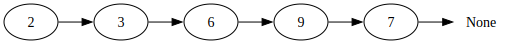

In [32]:
ll.visualize()

In [33]:
ll.append(69)

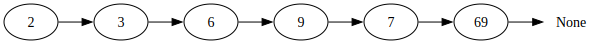

In [34]:
ll.visualize()

In [35]:
head=ll.get_head()

In [36]:
head.value

2

In [37]:
head.next.value

3

In [38]:
ll.get_tail().value

69